### 1. Download the file flux.csv from github (compressed as flux.csv.zip).

In [ ]:
!wget https://github.com/SpikeLab-CL/challenge_watershed/blob/main/flux.csv.zip

In [ ]:
!unzip flux.csv.zip

### 2. Perform an EDA over 'flux.csv'

I couldn't unzip the file via console which was rather strange. Must be some diferent header for the binary file given by the operating system I use. However I could unpack it manually. 

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('flux.csv')

In [4]:
data.head()

,date,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
0,1980-01-01,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1,1980-01-02,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
2,1980-01-03,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
3,1980-01-04,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
4,1980-01-05,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859


In [5]:
data.shape

(4180480, 10)

In [6]:
data.describe()

,basin_id,flux,precip,temp_max,lat,lon,mean_elev,area_km2
count,4.180480e+06,4.180480e+06,4.175037e+06,4.175037e+06,4.180480e+06,4.180480e+06,4.180480e+06,4.180480e+06
mean,7.179757e+06,5.253340e+01,2.947445e+00,1.365728e+01,-3.569572e+01,-7.129595e+01,1.760129e+03,2.404876e+03
std,3.180965e+06,1.676027e+02,8.766749e+00,6.615037e+00,8.047659e+00,1.254339e+00,1.382121e+03,4.322051e+03
min,1.001001e+06,0.000000e+00,0.000000e+00,-1.160359e+01,-5.494690e+01,-7.366670e+01,1.181229e+02,1.789123e+01
25%,4.558001e+06,8.680000e-01,0.000000e+00,9.162867e+00,-3.915000e+01,-7.231670e+01,5.847012e+02,3.761001e+02
50%,7.350003e+06,5.171000e+00,0.000000e+00,1.321396e+01,-3.588420e+01,-7.137190e+01,1.195311e+03,8.205541e+02
75%,9.416001e+06,2.990000e+01,6.422626e-01,1.805745e+01,-3.126560e+01,-7.050670e+01,3.048161e+03,2.461610e+03
max,1.293000e+07,1.580500e+04,2.132120e+02,4.081117e+01,-1.784280e+01,-6.763920e+01,4.910152e+03,5.224367e+04


In [7]:
### Missing values check
data.isnull().sum()

date             0
basin_id         0
flux             0
precip        5443
temp_max      5443
gauge_name       0
lat              0
lon              0
mean_elev        0
area_km2         0
dtype: int64

There are each the same amount of missing values in the 'percip' and 'temp_max' variable which need to be investigated further.

In [8]:
data.columns

Index(['date', 'basin_id', 'flux', 'precip', 'temp_max', 'gauge_name', 'lat',
       'lon', 'mean_elev', 'area_km2'],
      dtype='object')

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

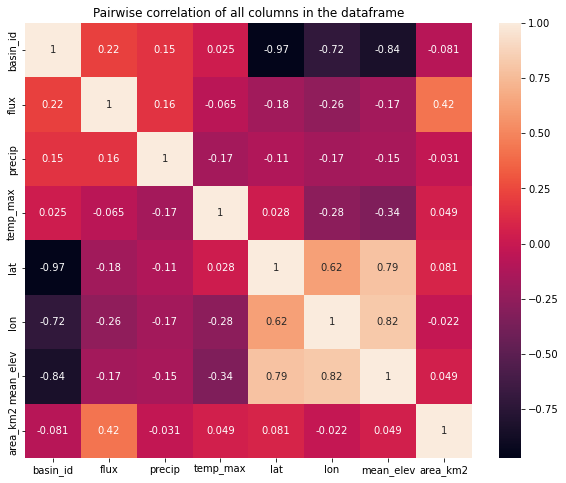

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(data= data.corr(), annot=True)
plt.title('Pairwise correlation of all columns in the dataframe')
### Save the figure
plt.savefig('corplot_all.png', dpi=300, bbox_inches='tight')
plt.show()

There is some negative corelation between the basin_id and the coordinates as same as the mean elevation variable. Which I assume that it is related to the order of the stations and the direction in which they are positioned further, they seem to follow a pattern where the mean elevation is decreasing, which totally makes sense.

In [11]:
data['date'] = pd.to_datetime(data.date,utc=True)

In [12]:
from datetime import datetime
from dateutil import relativedelta
min_date = data.date.min()
max_date = data.date.max()
### Get the interval between min and max date
diff = relativedelta.relativedelta(max_date, min_date)
print('Difference in years: ', diff.years)
print('Complete time delta: ')
print(diff.years , ' years, ', diff.months, ' months and ', diff.days, ' days')

Difference in years:  40
Complete time delta: 
40  years,  5  months and  5  days


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4180480 entries, 0 to 4180479
Data columns (total 10 columns):
 #   Column      Dtype              
---  ------      -----              
 0   date        datetime64[ns, UTC]
 1   basin_id    int64              
 2   flux        float64            
 3   precip      float64            
 4   temp_max    float64            
 5   gauge_name  object             
 6   lat         float64            
 7   lon         float64            
 8   mean_elev   float64            
 9   area_km2    float64            
dtypes: datetime64[ns, UTC](1), float64(7), int64(1), object(1)
memory usage: 318.9+ MB


In [14]:
data.nunique()

date            14768
basin_id          503
flux            35978
precip        1384281
temp_max      3901982
gauge_name        503
lat               485
lon               454
mean_elev         500
area_km2          500
dtype: int64

In [15]:
data = data.set_index('date')

In [16]:
data.head()

,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2
date,,,,,,,,,
1980-01-01 00:00:00+00:00,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1980-01-02 00:00:00+00:00,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1980-01-03 00:00:00+00:00,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1980-01-04 00:00:00+00:00,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859
1980-01-05 00:00:00+00:00,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859


Let's have a look how 'flux', 'precip' and 'temp_max'are related. For that I resample the resolution of the timeseries from daily to monthly means over all watersheds.

In [17]:
columns = ['flux','precip','temp_max']
df_monthly_mean = data[columns].resample('MS').mean()
df_monthly_mean.head()

,flux,precip,temp_max
date,,,
1980-01-01 00:00:00+00:00,21.840205,0.278403,20.634401
1980-02-01 00:00:00+00:00,20.065119,3.276719,19.224991
1980-03-01 00:00:00+00:00,17.804346,0.770800,20.086958
1980-04-01 00:00:00+00:00,39.721328,7.869142,12.658107
1980-05-01 00:00:00+00:00,87.438254,9.691204,11.269453


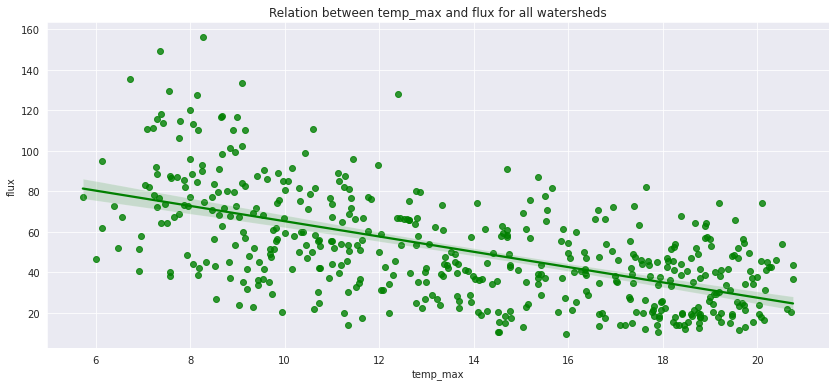

In [18]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.regplot(data=df_monthly_mean, x='temp_max', y='flux', color='g')
plt.title('Relation between temp_max and flux for all watersheds')
plt.show()

The flux shows a linear relation to the max temperature, the higher the mean temperature, the lower the flux, thus one can assume that the precipitation will show a similar behaviour.

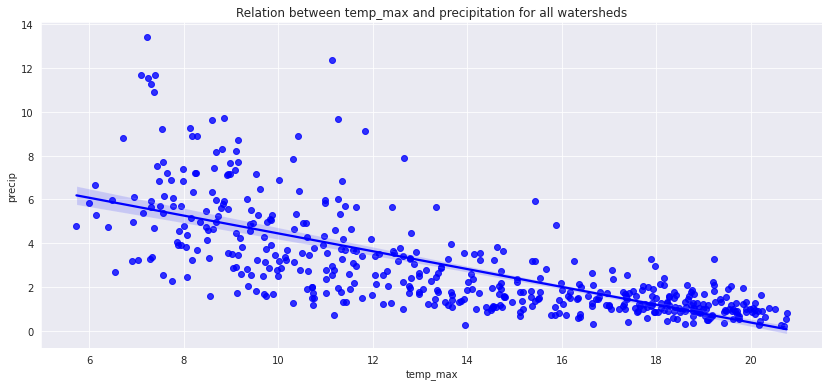

In [19]:
plt.figure(figsize=(14,6))
sns.set_style('darkgrid')
sns.regplot(data=df_monthly_mean, x='temp_max', y='precip', color='b')
plt.title('Relation between temp_max and precipitation for all watersheds')
plt.show()

As expected, the precipitation and max temperature relation follows a similar behaviour as the temp_max/flux relation already suggested.

Next let's have a look at the variation of the variables over time.

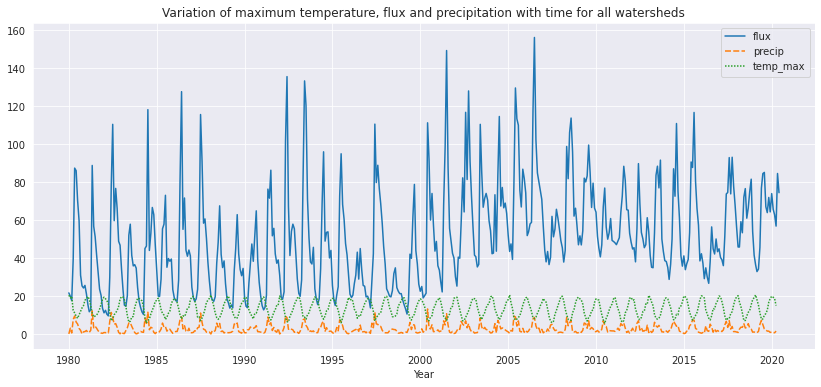

In [20]:
plt.figure(figsize=(14,6))
sns.lineplot(data = df_monthly_mean)
plt.xlabel('Year')
plt.title('Variation of maximum temperature, flux and precipitation with time for all watersheds')
plt.show()

Interesting to observe is that the variation of the temperature follows a very reliable pattern wheras the precipitation varies and thus does the flux as a consequence.

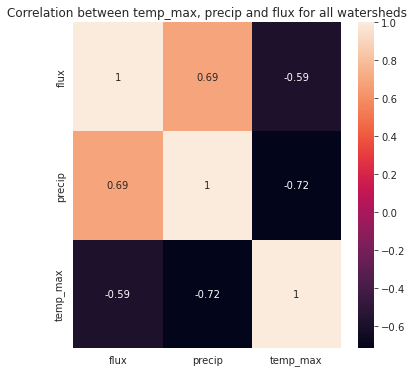

In [21]:
### Correlation plot of max temperature, precipitation and flux
sns.set_style('darkgrid')
plt.figure(figsize=(6,6))
plt.title('Correlation between temp_max, precip and flux for all watersheds')
sns.heatmap(data= df_monthly_mean.corr(), annot=True)
plt.show()

This correlation plot confirms the above relation between the respective variables. Another way to visualize the data would be a pairplot of those features which also ads the distributions of each.

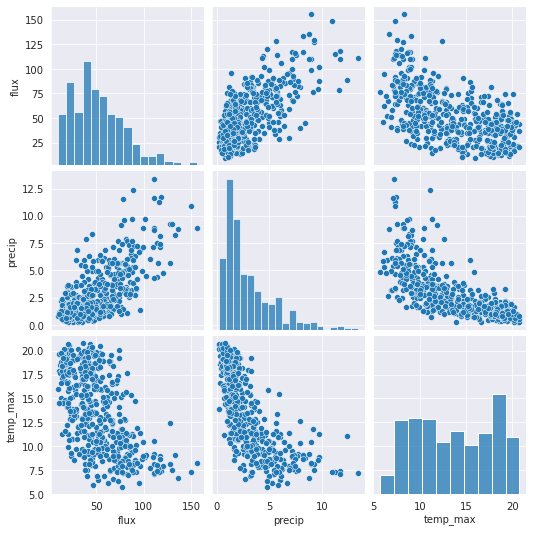

In [22]:
sns.pairplot(df_monthly_mean, kind='scatter')
### Save the figure
plt.savefig('scatter_pairplot.png', dpi=300, bbox_inches='tight')
plt.show()

In [23]:
# sns.set_style('darkgrid')
# sns.FacetGrid(data, hue='basin_id', height=10).map(plt.scatter, 'temp_max', 'precip')
# plt.title('2D Scatter Plot with Color Coding for each basin_id')
# plt.show()

Further we can check the distributions of the three variables by basin_id. This approach is not ideal due to the high amount of id's. One could group several id's together, given their initial nu

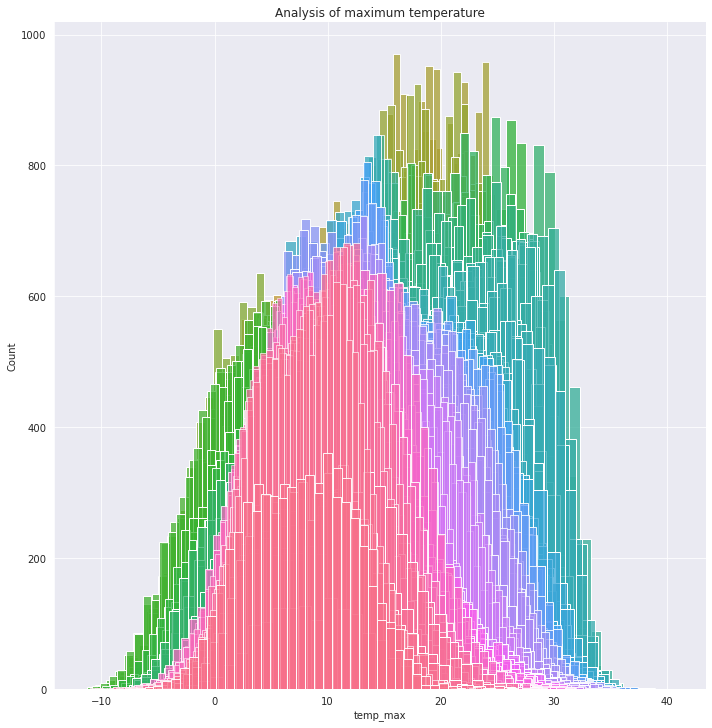

In [24]:
sns.set_style('darkgrid')
sns.FacetGrid(data, hue='basin_id', height=10).map(sns.histplot, 'temp_max')
plt.title('Analysis of maximum temperature')
plt.show()

In [25]:
# sns.set_style('darkgrid')
# sns.FacetGrid(data, hue='basin_id', height=10).map(sns.histplot, 'precip')
# plt.title('Analysis of precipitation')

In [26]:
# sns.set_style('darkgrid')
# sns.FacetGrid(data, hue='basin_id', height=10).map(sns.histplot, 'flux')
# plt.title('Analysis of flux')

Unfortunately I could not execute this plot since my notebook has only 32GB of RAM which was not enough to generate the plot for all watersheds.

### 3. Plot flux, temperature and precipitations:

* Item a) Write a function that plot a time series of a specific variable (flux, temp, precip) from a station. Should look like this:
  * def plot_one_timeserie(cod_station, variable, min_date, max_date):

First let's have a general overlook how the data behaves during the last 40 years.

In [27]:
### Function for plotting the above asked variables
FLUX_DATA = df_monthly_mean.iloc[:,0]
PRECIP_DATA = df_monthly_mean.iloc[:,1]
TEMP_DATA = df_monthly_mean.iloc[:,2]
def label_color(month):
    if month == 1:
        return 'January','blue'
    elif month == 2:
        return 'February','green'
    elif month == 3:
        return 'March','orange'
    elif month == 4:
        return 'April','yellow'
    elif month == 5:
        return 'May','red'
    elif month == 6:
        return 'June','violet'
    elif month == 7:
        return 'July','purple'
    elif month == 8:
        return 'August','black'
    elif month == 9:
        return 'September','brown'
    elif month == 10:
        return 'October','darkblue'
    elif month == 11:
        return 'November','grey'
    else:
        return 'December','pink'
    
def plot_month(month, data):
    label, color = label_color(month)
    mdata = data[data.index.month == month]
    sns.lineplot(data=mdata,label=label,color=color,marker='o')
    
def sns_plot(title, data):
    plt.figure(figsize=(14,8))
    plt.title(title)
    plt.xlabel('YEAR')
    for i in range(1,13):
        plot_month(i,data)
    plt.show()

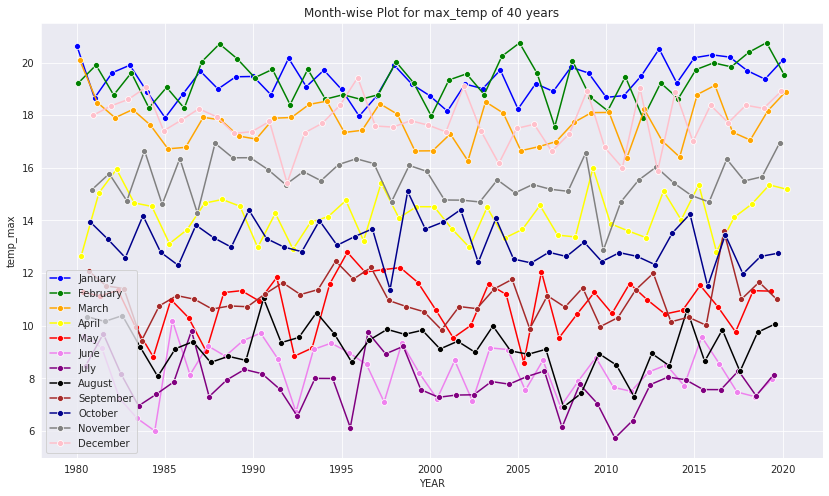

In [28]:
### Month-wise Plot for maximum temperature of 40 years 
title = 'Month-wise Plot for max_temp of 40 years' 
sns_plot(title, TEMP_DATA)

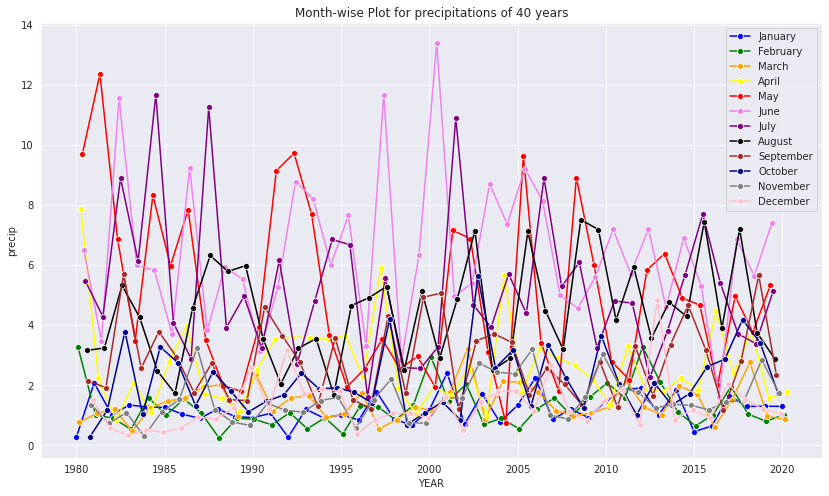

In [29]:
### Month-wise Plot for precipitations of 40 years 
title = 'Month-wise Plot for precipitations of 40 years' 
sns_plot(title, PRECIP_DATA)

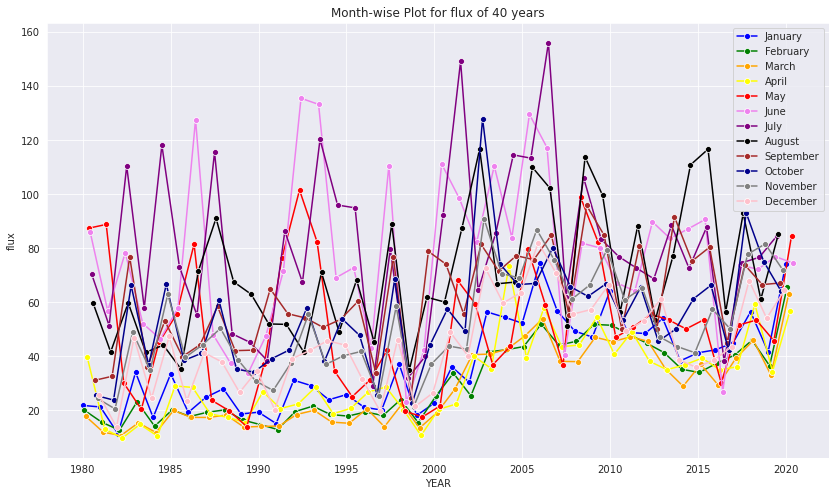

In [30]:
### Month-wise Plot for flux of 40 years 
title = 'Month-wise Plot for flux of 40 years' 
sns_plot(title, FLUX_DATA)

### Item a) Write a function that plot a time series of a specific variable (flux, temp, precip) from a station.

In [31]:
def plot_one_timeseries(cod_station, variable, min_date, max_date):
    '''
    Function to plot the time series of defined station and variable in specified time interval.
    Arguments:
        cod_station: int
        variable: str
        min_date: str
        max_date: str
    Returns:
        Plot of a time series with the previously specified parameters.        
    '''
    df = data.loc[(data.index >= min_date)\
                  &(data.index<=max_date)\
                  &(data.basin_id==cod_station)][variable]
    plt.figure(figsize=(14,8))
    sns.lineplot(data=df,label=variable,color='g',marker='o')
    plt.show()

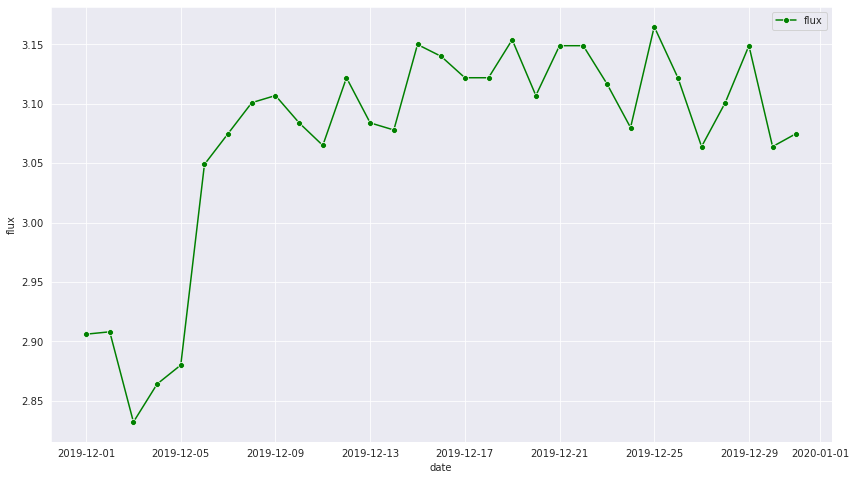

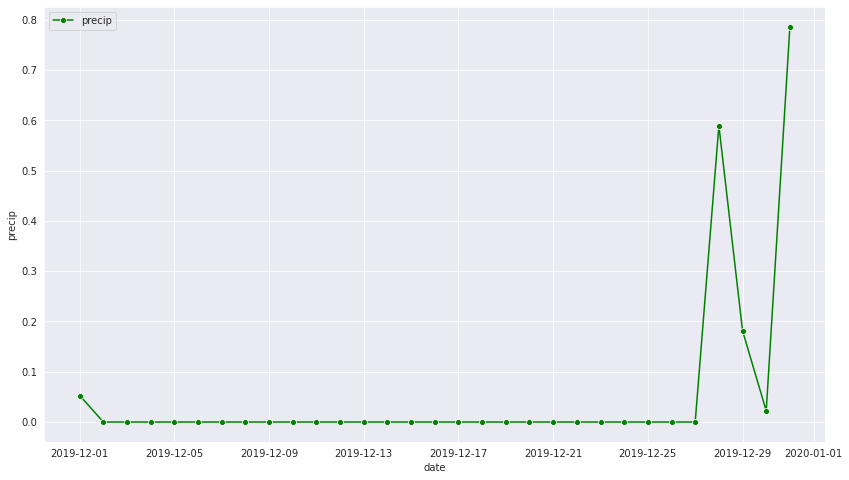

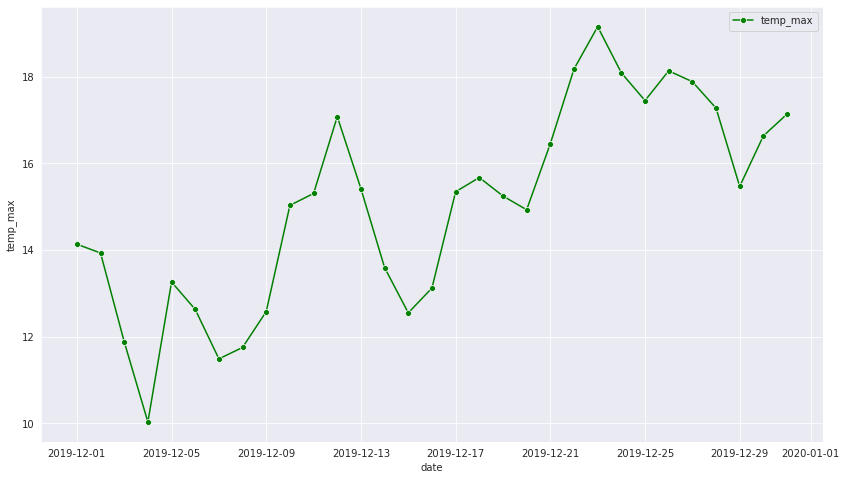

In [32]:
### Lets test the function
min_date = '2019-12-01'
max_date = '2019-12-31'
### The basin_id has to have data available in the specified time interval, else the plot will be empty
cod_station = 4320001

for variable in columns:
    plot_one_timeseries(cod_station, variable, min_date, max_date)

### Item b) Now write a function that plots the 3 variables at the same time.

First lets scale the features by using sklearn normalizer. As for the missing values, at the moment I am just removing them since they are missing for a specific watershed only and also at the end of it's respective time series, thus I don't think it it necessary to fill in the missing values for now.

In [33]:
%%capture
!pip install sklearn

In [34]:
from sklearn import preprocessing

d = preprocessing.normalize(data[columns].dropna())
scaled_df = pd.DataFrame(d, columns=columns)
scaled_df.index = data.dropna().index
scaled_df['basin_id'] = data.dropna()['basin_id']
scaled_df.head()

,flux,precip,temp_max,basin_id
date,,,,
1980-01-01 00:00:00+00:00,0.054105,0.0,0.998535,1001001
1980-01-02 00:00:00+00:00,0.047284,0.0,0.998881,1001001
1980-01-03 00:00:00+00:00,0.040311,0.0,0.999187,1001001
1980-01-04 00:00:00+00:00,0.036918,0.0,0.999318,1001001
1980-01-05 00:00:00+00:00,0.034448,0.0,0.999406,1001001


In [35]:
def plot_three_timeseries(cod_station, min_date, max_date):
    '''
    Function to plot three time series of a defined station in specified time interval.
    Arguments:
        cod_station: int
        min_date: str
        max_date: str
    Returns:
        Plot of three time series with the previously specified parameters.        
    '''
    df = scaled_df.loc[(scaled_df.index >= min_date)\
                       &(scaled_df.index<=max_date)\
                       &(scaled_df.basin_id==cod_station)][columns]
    plt.figure(figsize=(14,8))
    sns.lineplot(data=df,marker='o')
    plt.show()

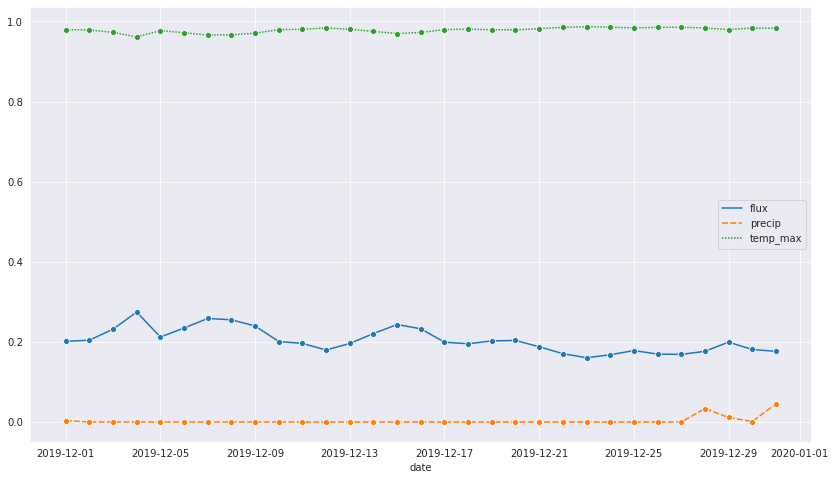

In [36]:
### Lets test the function
min_date = '2019-12-01'
max_date = '2019-12-31'
### The basin_id has to have data available in the specified time interval, else the plot will be empty
cod_station = 4320001

plot_three_timeseries(cod_station, min_date, max_date)

### 4. Create three variables called:
    * flux_extreme
    * temp_extreme
    * precip_extreme

There are four seasons in Chile: summer (December to February), autumn (March to May), winter (June to August), and spring (September to November).

In [37]:
import numpy as np

def labels_seasons(data):
    df = data.copy()
    df['season'] = np.where(df.index.month.isin([12,1,2]),'summer',
                          np.where(df.index.month.isin([3,4,5]),'autumn',
                                   np.where(df.index.month.isin([6,7,8]),'winter',
                                            np.where(df.index.month.isin([9,10,11]),'spring','NA'))))
    return df

In [38]:
df_with_seasons = labels_seasons(data)
df_with_seasons.head()

,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,season
date,,,,,,,,,,
1980-01-01 00:00:00+00:00,1001001,0.579,0.0,10.685653,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
1980-01-02 00:00:00+00:00,1001001,0.543,0.0,11.470960,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
1980-01-03 00:00:00+00:00,1001001,0.482,0.0,11.947457,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
1980-01-04 00:00:00+00:00,1001001,0.459,0.0,12.424489,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer
1980-01-05 00:00:00+00:00,1001001,0.436,0.0,12.649203,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,summer


In [39]:
### Check if everything is OK
df_with_seasons.season.unique()

array(['summer', 'autumn', 'winter', 'spring'], dtype=object)

Also from here on the missing values are filled up with the mean for each basin_id.

In [40]:
### Fill missing data with mean by basin_id
grouped = df_with_seasons.groupby('basin_id')

grouped_df = []
for name,group in grouped:
    precip_mean = group.dropna()['precip'].mean()
    max_tp_mean = group.dropna()['temp_max'].mean()
    group.precip.fillna(precip_mean, inplace=True)
    group.temp_max.fillna(max_tp_mean, inplace=True)
    grouped_df.append(group)

df_with_seasons = pd.concat(grouped_df)

In [41]:
df_with_seasons.isnull().sum()

basin_id      0
flux          0
precip        0
temp_max      0
gauge_name    0
lat           0
lon           0
mean_elev     0
area_km2      0
season        0
dtype: int64

In [42]:
def extreme_values(data):
    df=data.copy()
    grouped = df.groupby('season')
    grouped_df = []
    for name, group in grouped:
        fe = np.percentile(group.flux,95)
        te = np.percentile(group.temp_max,95)
        pe = np.percentile(group.precip,95)
        print('The extreme values for flux during',name,'is:',round(fe,5),\
              ',temperature:',round(te,5),\
              'and precipitation:',round(pe,5))
        group['flux_extreme'] = np.where(group.flux>=fe,1,0)
        group['temp_extreme'] = np.where(group.flux>=te,1,0)
        group['precip_extreme'] = np.where(group.flux>=pe,1,0)
        grouped_df.append(group)
        
    return pd.concat(grouped_df)

In [43]:
df_extreme_vals = extreme_values(df_with_seasons)
df_extreme_vals.head()

The extreme values for flux during autumn is: 171.0 ,temperature: 24.14923 and precipitation: 18.02909
The extreme values for flux during spring is: 310.0 ,temperature: 22.57138 and precipitation: 13.67244
The extreme values for flux during summer is: 185.0 ,temperature: 28.26048 and precipitation: 7.40402
The extreme values for flux during winter is: 407.0 ,temperature: 16.09464 and precipitation: 30.48464


,basin_id,flux,precip,temp_max,gauge_name,lat,lon,mean_elev,area_km2,season,flux_extreme,temp_extreme,precip_extreme
date,,,,,,,,,,,,,
1980-03-01 00:00:00+00:00,1001001,0.226,0.000000,10.972850,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,autumn,0,0,0
1980-03-02 00:00:00+00:00,1001001,0.230,4.149928,10.159425,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,autumn,0,0,0
1980-03-03 00:00:00+00:00,1001001,0.286,5.727318,7.792420,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,autumn,0,0,0
1980-03-04 00:00:00+00:00,1001001,0.332,2.767426,7.555432,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,autumn,0,0,0
1980-03-05 00:00:00+00:00,1001001,0.356,0.000000,8.827649,Rio Caquena En Nacimiento,-18.0769,-69.1961,4842.449328,49.711859,autumn,0,0,0


#### Q: Do you consider this a good way of capturing extreme events? Or you would have used a different method? Which one?

#### A: I think that using statistical moments to find extreme values is a very suitable approach here and setting the threshold of an extreme event to all values above the 95% mark is valid. I can't suggest any different method at this moment since I am not used to work with this kind of data and thus would need to study more about the given scenario.

### 5. Plot the variable flux_extreme. Are there any different behaviours among different watersheds?

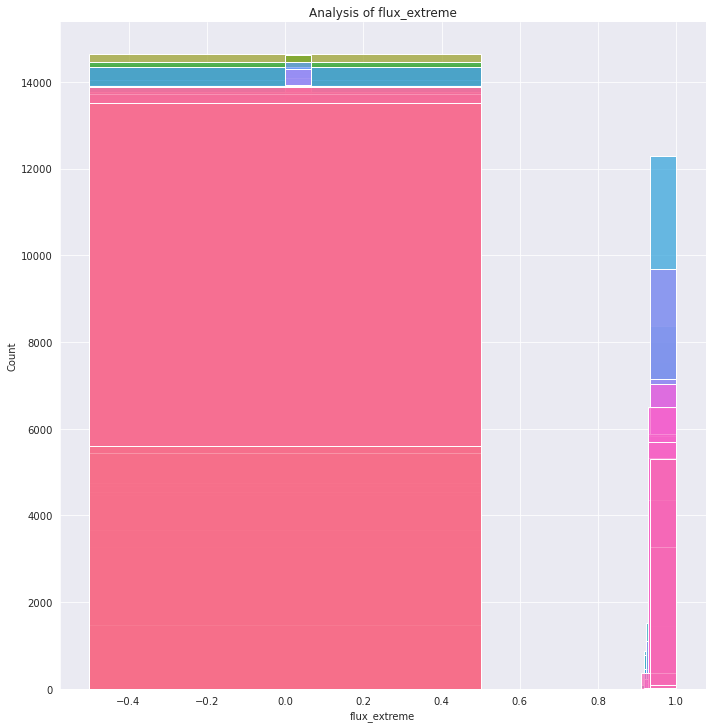

In [44]:
sns.set_style('darkgrid')
sns.FacetGrid(df_extreme_vals, hue='basin_id', height=10).map(sns.histplot, 'flux_extreme')
plt.title('Analysis of flux_extreme')
plt.show()

As we can see the behaviours among different watersheds varies when looking at the extreme flux. Subsetting the watersheds into more local groups could lead to more detailed information about the varying behaviours.

### 6. Plot the percentage of extreme events during time. Have they become more frequent?

The following visualization will show the yearly occurance of extreme flux values per year. The extreme values were previously derived looking at the extremes for each season over all years considering the occurances for each basin_id individually.

In [45]:
cross_tab_prop = pd.crosstab(index=df_extreme_vals.index.year,
                             columns=df_extreme_vals['flux_extreme'],
                             normalize='index')

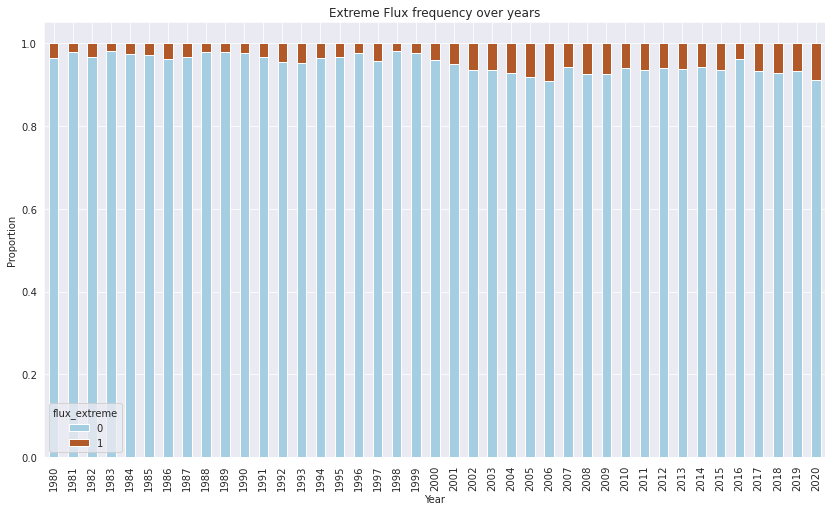

In [46]:
cross_tab_prop.plot(kind='bar', 
                    stacked=True, 
                    colormap='Paired', 
                    figsize=(14, 8))

plt.xlabel('Year')
plt.ylabel('Proportion')
plt.title('Extreme Flux frequency over years')
plt.show()

Purely analyzing the visual information one can say that the extreme flux events have become more frequent when looking at the first 20 years of data compared to the last 20 years. It can also be observed that there was a period between 2001-2007 where the flux frequency was increasing steadily.

### 7. Extreme Flux prediction

For the following model is assumed, since there are 503 contributing basins, an analysis of each watershed individually is not quite apropriate because the data for each basin is not consistent in regard of the timelines where data exists. Thus, the timeseries that is used in the model, is a daily mean of the flux data from all contributing watersheds that actually provided data. As a consequence the extreme flux values will be different then in the previous analysis made.

In [47]:
### Copy dataframe for further use
aux_df = df_extreme_vals.copy()

In [48]:
### Resample the data to a daily mean
columns = ['flux','precip','temp_max','area_km2']
daily = aux_df[columns].resample('D').mean()
daily.head()

,flux,precip,temp_max,area_km2
date,,,,
1980-01-01 00:00:00+00:00,27.873125,0.020666,20.558056,1926.297554
1980-01-02 00:00:00+00:00,27.452393,0.004158,19.672478,1929.614304
1980-01-03 00:00:00+00:00,26.401398,0.002575,19.936710,1970.685327
1980-01-04 00:00:00+00:00,25.445870,0.019064,18.844846,1958.168785
1980-01-05 00:00:00+00:00,24.732571,0.020002,20.160857,1964.308400


I chose to use only features given in the original dataset. Since I create time series of the means of each contributing basin for every day the most convinient variables from the dataset are flux, precip, temp_max, area_km2. Where temp_max need to be considered a problematic mean due to the big area all the stations are distributed in. For each series in the model dataset a 3 days lag was created that is used to predict the next days probability for an extreme flux. Given the nature how the time-series are created, using the daily mean of all contributing basins, no other feature from the dataset are apropriate.

In [49]:
### n lags of observations that the model looks back to predict the next value
N_LAGS = 3

df_list = []
for c in daily.columns:
    
    if c =='flux':
        ts = pd.Series(daily[c].values)
        
        ### Constructing an observation set based on lags
        ts_df = pd.concat([ts.shift(i) for i in range(N_LAGS, -1, -1)], axis=1)
        ### Assign lagged column names
        ts_df.columns = ['t-'+str(i)+'_'+c for i in list(reversed(range(N_LAGS)))] + ['t+1']
        ts_df = ts_df.dropna().reset_index(drop=True)
    else:
        ts = pd.Series(daily[c].values)
        ### Constructing an observation set based on lags
        ts_df = pd.concat([ts.shift(i) for i in range(N_LAGS, -1, -1)], axis=1)
        ### Assign lagged column names
        ts_df.columns = ['t-'+str(i)+'_'+c for i in list(reversed(range(N_LAGS)))] + ['t+1']
        ts_df = ts_df.drop('t+1', axis=1)
        ts_df = ts_df.dropna().reset_index(drop=True)
    
    df_list.append(ts_df)

In [50]:
model_df = pd.concat(df_list,axis=1)

In [51]:
model_df.head()

,t-2_flux,t-1_flux,t-0_flux,t+1,t-2_precip,t-1_precip,t-0_precip,t-2_temp_max,t-1_temp_max,t-0_temp_max,t-2_area_km2,t-1_area_km2,t-0_area_km2
0,27.873125,27.452393,26.401398,25.445870,0.020666,0.004158,0.002575,20.558056,19.672478,19.936710,1926.297554,1929.614304,1970.685327
1,27.452393,26.401398,25.445870,24.732571,0.004158,0.002575,0.019064,19.672478,19.936710,18.844846,1929.614304,1970.685327,1958.168785
2,26.401398,25.445870,24.732571,24.137392,0.002575,0.019064,0.020002,19.936710,18.844846,20.160857,1970.685327,1958.168785,1964.308400
3,25.445870,24.732571,24.137392,23.847688,0.019064,0.020002,0.047394,18.844846,20.160857,19.916274,1958.168785,1964.308400,1982.997726
4,24.732571,24.137392,23.847688,22.973811,0.020002,0.047394,0.004318,20.160857,19.916274,20.160537,1964.308400,1982.997726,1982.997726


In [53]:
from sklearn.model_selection import train_test_split

### The target is column 't+1' representing the next value of the series
y = model_df['t+1']
### Get predictor variables
X = model_df.drop('t+1', axis=1)

### Train/Test split (one could consider a cross validation approach for a more robust result)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=False)

### Setting threshold as previously
thr = np.quantile(y_train, .95)

### Convert the numeric target to binary
y_train_bin = (y_train >= thr).astype(int)
y_test_bin = (y_test >= thr).astype(int)

#### Using Logistic Regression

In [55]:
from sklearn.linear_model import LogisticRegression
import random
### Probabilistic Classifier
random.seed(42)
model_log_reg = LogisticRegression()
model_log_reg.fit(X_train, y_train_bin)

### Predicting exceedance probability
exc_prob_log_reg = model_log_reg.predict_proba(X_test)[:, 1]

/home/chriz/miniconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

           0       1.00      0.98      0.99      4743
           1       0.60      0.84      0.70       130

    accuracy                           0.98      4873
   macro avg       0.80      0.91      0.84      4873
weighted avg       0.98      0.98      0.98      4873



/home/chriz/miniconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


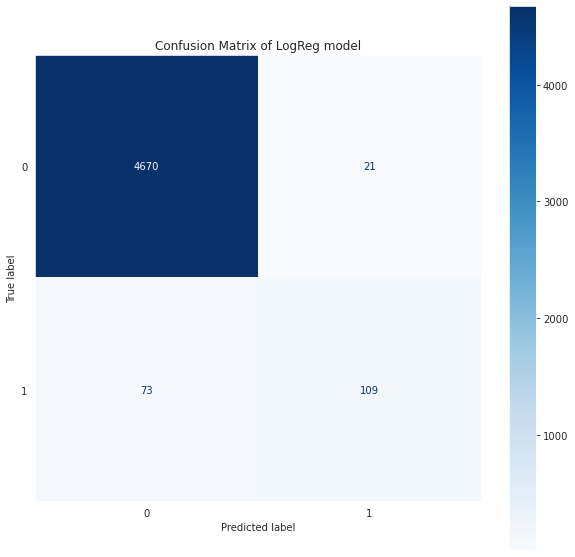

In [57]:
from sklearn.metrics import accuracy_score, recall_score, ConfusionMatrixDisplay, classification_report, auc, precision_score

fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(
    model_log_reg,
    X_test,
    y_test_bin,
    cmap=plt.cm.Blues,
    normalize=None,
    ax = ax)
disp.ax_.set_title('Confusion Matrix of LogReg model')
disp.ax_.grid(False)

y_pred=model_log_reg.predict(X_test.values)
print(classification_report(y_pred, y_test_bin))

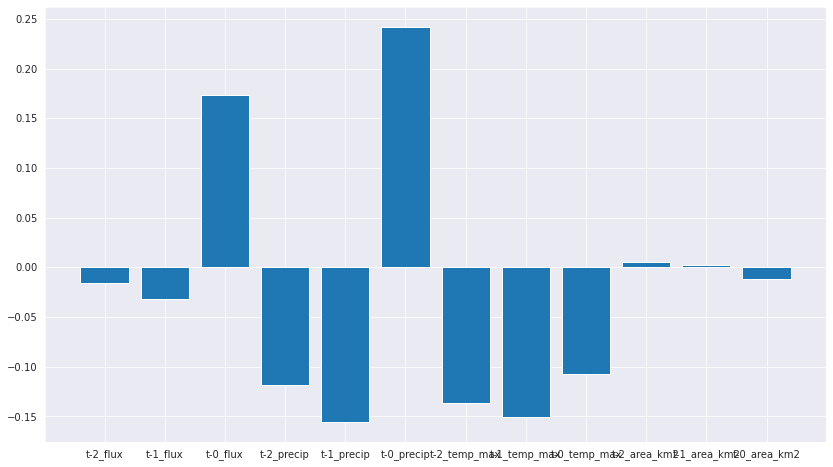

In [58]:
### Get coefficient based importance score
importance = model_log_reg.coef_[0]
### Plot feature importance
plt.figure(figsize=(14,8))
plt.bar([x for x in np.array(model_df.drop('t+1',axis=1).columns)], importance)
plt.show()

#### Using LightGBM

In [59]:
### Ensamble classifier
import lightgbm as lgb
random.seed(42)
model_lgbm = lgb.LGBMClassifier()
model_lgbm.fit(X_train, y_train_bin)

LGBMClassifier()

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4682
           1       0.84      0.80      0.82       191

    accuracy                           0.99      4873
   macro avg       0.91      0.89      0.90      4873
weighted avg       0.99      0.99      0.99      4873



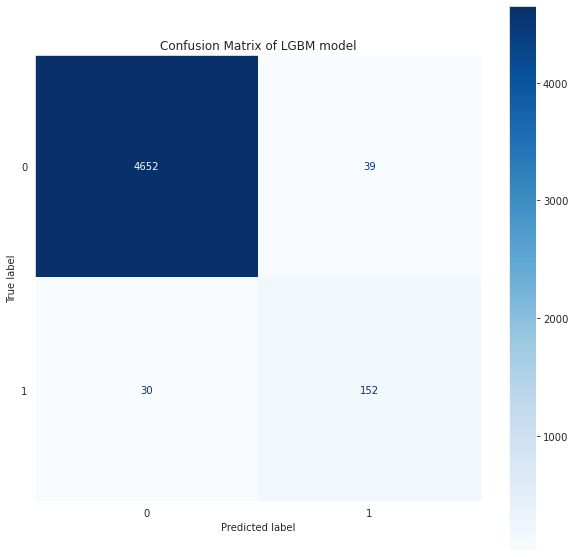

In [60]:
fig, ax = plt.subplots(figsize=(10, 10))
disp = ConfusionMatrixDisplay.from_estimator(
    model_lgbm,
    X_test,
    y_test_bin,
    cmap=plt.cm.Blues,
    normalize=None,
    ax = ax)
disp.ax_.set_title('Confusion Matrix of LGBM model')
disp.ax_.grid(False)

y_pred=model_lgbm.predict(X_test.values)
print(classification_report(y_pred, y_test_bin))

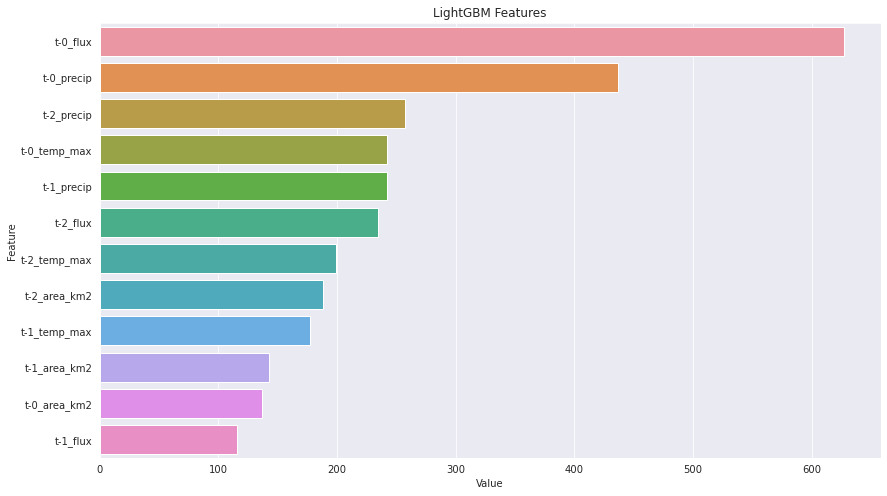

In [61]:
feature_imp = pd.DataFrame(sorted(zip(model_lgbm.feature_importances_,X.columns)), columns=['Value','Feature'])

plt.figure(figsize=(14,8))
sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features')
plt.show()


### 8. Analyze the model results.

From the both tested models, the LightGBMs performance is slightly better then the Logistic Regression model. Given the nature of the extremely imbalanced dataset, the LGBM model is more capable of catching the positive class, which in case means that an extreme flux event would occur. the LGBM model also has a better FN value and catches more of the true cases. Due to the imbalance of the target, I would chose the macro average F1-score as metric to evaluate the models since it treats all classes equally. In both models the area_km2 variable have little importance compared to the others, however it is strange that the t-1_flux feature also has little importance in case of the LGBM and regression model.

To identify at least 70% of the extreme flux events the recall value is a good indicator. Under the circumstances of the imbalanced dataset, the model performance is still good.